In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

In [2]:
class cov_matrix():
    def __init__(self):
        self.cutoff_t = '2019-01-02'

    def obtain_returns_from_universe(self, load=False):
        if load == True:
            self.returns = pd.read_csv('returns_universe.csv')
            self.returns['Date'] = pd.to_datetime(c.returns['Date'])
            self.returns.set_index('Date', inplace=True)
        else:
            # Connect to MySQL database
            connection = mysql.connector.connect(
                host="ubctg.con7266gcvin.us-east-2.rds.amazonaws.com",
                user="admin",
                password="ubctgquant",
                database="ubctg"
            )
        
            # Create a cursor object to execute SQL queries
            cursor = connection.cursor()
            
            # Define the start and end dates
            start_date = '2019-01-01'
            end_date = '2020-01-31'
            
            # SQL query to retrieve data from the "Volatility" table between two dates
            sql_query = f"SELECT * FROM Returns WHERE Date BETWEEN '{start_date}' AND '{end_date}'"
            
            # Execute the SQL query
            cursor.execute(sql_query)
            
            # Fetch all rows from the result set
            returns_data = cursor.fetchall()
            
            cursor.close()
        
            # turn it into a proper Pandas dataframe
            returns_df = pd.DataFrame(returns_data, columns=[i[0] for i in cursor.description])
            # Convert 'Date' column to datetime
            returns_df['Date'] = pd.to_datetime(returns_df['Date'])
            
            # Set the 'Date' column as the index
            returns_df.set_index('Date', inplace=True)
        
            self.returns = returns_df
        
        self.tickers = self.returns["Ticker"].unique()

    def obtain_returns_for_date(self, t):
        self.Rs = self.returns.loc[t]
        self.Rf = self.returns_factors.loc[t]

    def obtain_returns_from_universe_factors(self, load=False):
        if load == True:
            self.returns_factors = pd.read_csv('returns_factors.csv')
            self.returns_factors['Date'] = pd.to_datetime(c.returns_factors['Date'])
            self.returns_factors.set_index('Date', inplace=True)
        else:
            print("!!!")

    def obtain_filter(self, t):
        self.M_t =  pd.DataFrame(
                np.random.randint(0, 2, size=(len(c.tickers), 8)),  # Generate random 0s and 1s
                index=c.tickers,
                columns=[str(i) for i in range(1, 8+1)]  # Columns named 1 through 8
        )
    
    def calc_factor_loadings(self, t):
        # print("!!!")
        # speed up by:
        #   multiprocessing (iter ...)
        #   group into buckets with the same factors

        self.F = pd.DataFrame(0.0, index=self.tickers, columns=[str(i) for i in range(1, 9)])
    
        for ticker in c.tickers: 
            print(ticker)
            mask = self.M_t.loc[ticker] == 1
            date_iloc = np.where(self.returns[self.returns["Ticker"] == ticker].index == t)[0]
            if len(date_iloc != 0):
                date_iloc = date_iloc[0]
                
                X = self.returns_factors.loc[:,self.returns_factors.columns[mask]].iloc[0:date_iloc]
                y = self.returns[c.returns["Ticker"] == ticker]["Returns"].iloc[0:date_iloc].values
                # X = X.iloc[0:min(X.shape[0], y.shape[0])] # !!! <--- make sure you use all data up to t, not just all data.
                #y = y[0:min(X.shape[0], y.shape[0])]
                # print(y.shape, X.shape)
                coeffs, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
                self.F.loc[ticker, mask] = coeffs
            else:
                self.F.loc[ticker, mask] = np.zeros(mask.sum())

    def calc_factor_cov_matrix(self, t):
        print("!!!")
        self.A = self.returns_factors[(self.returns_factors.index >= self.cutoff_t ) & (self.returns_factors.index < t)].cov()

    def calc_factor_matrix(self, t):
        print("!!!")
        # c.B_t = 

    def calc_cov_matrix(self, t):
        print("!!!")
        # c.sigma_t = 
        

In [122]:
# ticker = "ELA"

# c.F = pd.DataFrame(0.0, index=c.tickers, columns=[str(i) for i in range(1, 9)])

# for ticker in c.tickers: 
#     print(ticker)
#     mask = c.M_t.loc[ticker] == 1
#     date_iloc = np.where(c.returns[c.returns["Ticker"] == ticker].index == t)[0]
#     if len(date_iloc != 0):
#         date_iloc = date_iloc[0]
        
#         X = c.returns_factors.loc[:,c.returns_factors.columns[mask]].iloc[0:date_iloc]
#         y = c.returns[c.returns["Ticker"] == ticker]["Returns"].iloc[0:date_iloc].values
#         # X = X.iloc[0:min(X.shape[0], y.shape[0])] # !!! <--- make sure you use all data up to t, not just all data.
#         #y = y[0:min(X.shape[0], y.shape[0])]
#         # print(y.shape, X.shape)
#         coeffs, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
#         c.F.loc[ticker, mask] = coeffs
#     else:
#         c.F.loc[ticker, mask] = np.zeros(mask.sum())

In [3]:
t = "2019-02-01"
c = cov_matrix()
# tickers = c.returns["Ticker"].unique()

In [8]:
c.M = pd.read_csv('pick_matrix.csv')
c.M = c.M.set_index("Unnamed: 0")
for i,j in enumerate(c.M.columns):
    c.M = c.M.rename(columns={j: i})
c.M

,0,1,2,3,4,5,6,7,8
Unnamed: 0,,,,,,,,,
JJSF,0,1,0,0,0,0,0,0,0
DGSE,0,0,0,0,0,0,1,0,0
ELA,0,0,0,0,0,0,0,0,0
PLXS,0,0,0,0,0,0,0,0,0
RMCF,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
FN,0,0,0,0,0,0,0,0,0
BSFT,0,0,0,0,0,0,0,0,0
CBOE,0,0,0,0,0,0,0,0,0


In [14]:
c.M

,0,1,2,3,4,5,6,7,8
Unnamed: 0,,,,,,,,,
JJSF,0,1,0,0,0,0,0,0,0
DGSE,0,0,0,0,0,0,1,0,0
ELA,0,0,0,0,0,0,0,0,0
PLXS,0,0,0,0,0,0,0,0,0
RMCF,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
FN,0,0,0,0,0,0,0,0,0
BSFT,0,0,0,0,0,0,0,0,0
CBOE,0,0,0,0,0,0,0,0,0


In [48]:
for i, name in enumerate(c.returns_factors.columns):
    c.returns_factors.rename(columns = {name: str(i)}, inplace=True)

In [49]:
# c.returns_factors.rename(columns = {"Energy_Index": str(1)}, inplace=True)
c.returns_factors

,0,1,2,3,4,5,6,7,8
Date,,,,,,,,,
2019-01-02,0.006602,0.001376,-0.010762,-0.000395,-0.001970,-0.014113,0.008254,0.004748,0.005899
2019-01-03,-0.009767,-0.038831,-0.026461,-0.019520,-0.013465,0.000451,-0.018293,-0.025491,-0.013988
2019-01-04,0.032609,0.036603,0.033046,0.032033,0.035574,0.019628,0.035314,0.043051,0.027287
2019-01-07,0.008354,0.007724,0.005161,0.004261,0.015182,0.010286,0.020824,0.010588,0.006283
2019-01-08,0.012566,0.012406,0.009464,0.005032,0.010502,0.019014,0.011826,0.013124,0.005155
...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.000161,0.010011,0.004632,-0.006889,0.012189,0.002773,-0.002866,0.004446,-0.000684
2021-01-26,-0.013542,-0.002927,-0.007613,-0.006219,-0.006305,0.007840,0.003198,0.001211,-0.003183
2021-01-27,-0.025848,-0.022602,-0.029112,-0.029406,-0.029853,-0.019873,-0.022875,-0.022060,-0.021064


In [36]:
c.returns_factors

,Energy_Index,Manufacturing_Index,Industrial_Index,Financials_Index,Life_Sciences_Index,Real_Estate_Index,Trade_Index,Technology_Index,No_Industry_Index
Date,,,,,,,,,
2019-01-02,0.006602,0.001376,-0.010762,-0.000395,-0.001970,-0.014113,0.008254,0.004748,0.005899
2019-01-03,-0.009767,-0.038831,-0.026461,-0.019520,-0.013465,0.000451,-0.018293,-0.025491,-0.013988
2019-01-04,0.032609,0.036603,0.033046,0.032033,0.035574,0.019628,0.035314,0.043051,0.027287
2019-01-07,0.008354,0.007724,0.005161,0.004261,0.015182,0.010286,0.020824,0.010588,0.006283
2019-01-08,0.012566,0.012406,0.009464,0.005032,0.010502,0.019014,0.011826,0.013124,0.005155
...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.000161,0.010011,0.004632,-0.006889,0.012189,0.002773,-0.002866,0.004446,-0.000684
2021-01-26,-0.013542,-0.002927,-0.007613,-0.006219,-0.006305,0.007840,0.003198,0.001211,-0.003183
2021-01-27,-0.025848,-0.022602,-0.029112,-0.029406,-0.029853,-0.019873,-0.022875,-0.022060,-0.021064


In [17]:
c.returns_factors

,Energy_Index,Manufacturing_Index,Industrial_Index,Financials_Index,Life_Sciences_Index,Real_Estate_Index,Trade_Index,Technology_Index,No_Industry_Index
Date,,,,,,,,,
2019-01-02,0.006602,0.001376,-0.010762,-0.000395,-0.001970,-0.014113,0.008254,0.004748,0.005899
2019-01-03,-0.009767,-0.038831,-0.026461,-0.019520,-0.013465,0.000451,-0.018293,-0.025491,-0.013988
2019-01-04,0.032609,0.036603,0.033046,0.032033,0.035574,0.019628,0.035314,0.043051,0.027287
2019-01-07,0.008354,0.007724,0.005161,0.004261,0.015182,0.010286,0.020824,0.010588,0.006283
2019-01-08,0.012566,0.012406,0.009464,0.005032,0.010502,0.019014,0.011826,0.013124,0.005155
...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.000161,0.010011,0.004632,-0.006889,0.012189,0.002773,-0.002866,0.004446,-0.000684
2021-01-26,-0.013542,-0.002927,-0.007613,-0.006219,-0.006305,0.007840,0.003198,0.001211,-0.003183
2021-01-27,-0.025848,-0.022602,-0.029112,-0.029406,-0.029853,-0.019873,-0.022875,-0.022060,-0.021064


In [16]:
for i in range(8):
    c.returns_factors[str(i)] = c.returns_factors["Diagonal"]
c.returns_factors = c.returns_factors.drop('Diagonal', axis=1)

In [9]:
c.cutoff_t

'2019-01-02'

In [12]:
c.obtain_returns_from_universe(True)
# ----> obtain factor returns
c.obtain_returns_from_universe_factors(True)
# for i in range(8):
    # c.returns_factors[str(i)] = c.returns_factors["Diagonal"]
# c.returns_factors = c.returns_factors.drop('Diagonal', axis=1)
c.obtain_filter(t)
c.obtain_returns_for_date(t)


In [13]:
c.calc_factor_loadings(t)

JJSF


IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8

In [ ]:
# Matrix B = F^-1 * A * F
# factor weights inverse
# Moore-Penrose pseudo-inverse, need to check this
F_inv = np.linalg.pinv(F)
print("Calculated F^-1 with shape", np.shape(F_inv))
B = F_inv @ A @ F
print("Calculated B with shape", np.shape(B))

In [126]:
c.obtain_returns_from_universe_factors(True)
c.calc_factor_cov_matrix(t)

!!!


In [47]:
# c.calc_factor_loadings(t)
# plt.figure(dpi=300)
# plt.imshow(np.cov(c.returns_factors.transpose()))

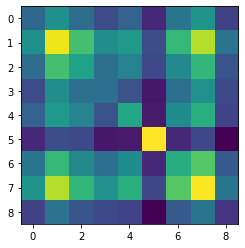

In [120]:
plt.imshow(c.A)

In [52]:
t

'2019-02-01'

In [57]:
cutoff_t = "2019-01-02"

In [73]:
c.returns_factors["Energy_Index"] = c.returns_factors["Manufacturing_Index"] / c.returns_factors["Manufacturing_Index"]

In [77]:
c.A = c.returns_factors[(c.returns_factors.index >= cutoff_t) & (c.returns_factors.index < t)].cov()
c.A

,Energy_Index,Manufacturing_Index,Industrial_Index,Financials_Index,Life_Sciences_Index,Real_Estate_Index,Trade_Index,Technology_Index,No_Industry_Index
Energy_Index,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Manufacturing_Index,0.0,0.000219,0.000169,0.000130,0.000139,0.000084,0.000162,0.000203,0.000110
Industrial_Index,0.0,0.000169,0.000146,0.000108,0.000121,0.000080,0.000126,0.000162,0.000087
Financials_Index,0.0,0.000130,0.000108,0.000107,0.000087,0.000052,0.000106,0.000133,0.000081
Life_Sciences_Index,0.0,0.000139,0.000121,0.000087,0.000149,0.000052,0.000129,0.000155,0.000076
Real_Estate_Index,0.0,0.000084,0.000080,0.000052,0.000052,0.000224,0.000060,0.000079,0.000039
Trade_Index,0.0,0.000162,0.000126,0.000106,0.000129,0.000060,0.000154,0.000175,0.000091
Technology_Index,0.0,0.000203,0.000162,0.000133,0.000155,0.000079,0.000175,0.000223,0.000111
No_Industry_Index,0.0,0.000110,0.000087,0.000081,0.000076,0.000039,0.000091,0.000111,0.000068


In [74]:
c.A = c.returns_factors[(c.returns_factors.index >= cutoff_t) & (c.returns_factors.index < t)].cov()
cutoff_index = c.returns_factors[(c.returns_factors.index >= cutoff_t)]

cutoff_index

,Energy_Index,Manufacturing_Index,Industrial_Index,Financials_Index,Life_Sciences_Index,Real_Estate_Index,Trade_Index,Technology_Index,No_Industry_Index
Date,,,,,,,,,
2019-01-02,1.0,0.001376,-0.010762,-0.000395,-0.001970,-0.014113,0.008254,0.004748,0.005899
2019-01-03,1.0,-0.038831,-0.026461,-0.019520,-0.013465,0.000451,-0.018293,-0.025491,-0.013988
2019-01-04,1.0,0.036603,0.033046,0.032033,0.035574,0.019628,0.035314,0.043051,0.027287
2019-01-07,1.0,0.007724,0.005161,0.004261,0.015182,0.010286,0.020824,0.010588,0.006283
2019-01-08,1.0,0.012406,0.009464,0.005032,0.010502,0.019014,0.011826,0.013124,0.005155
...,...,...,...,...,...,...,...,...,...
2021-01-25,1.0,0.010011,0.004632,-0.006889,0.012189,0.002773,-0.002866,0.004446,-0.000684
2021-01-26,1.0,-0.002927,-0.007613,-0.006219,-0.006305,0.007840,0.003198,0.001211,-0.003183
2021-01-27,1.0,-0.022602,-0.029112,-0.029406,-0.029853,-0.019873,-0.022875,-0.022060,-0.021064


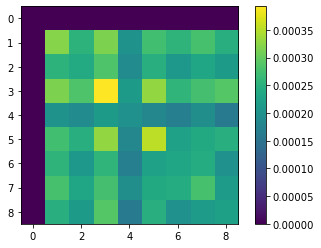

In [75]:
plt.imshow(cutoff_index.cov())
plt.colorbar()

In [56]:
c.returns_factors

In [50]:
c.returns

,Permno,Ticker,Returns
Date,,,
2019-01-02,10026,JJSF,-0.024829
2019-01-03,10026,JJSF,0.014326
2019-01-04,10026,JJSF,0.012725
2019-01-07,10026,JJSF,0.003935
2019-01-08,10026,JJSF,0.022626
...,...,...,...
2020-01-27,93436,TSLA,-0.012039
2020-01-28,93436,TSLA,0.015913
2020-01-29,93436,TSLA,0.024854


In [20]:
# ----> obtain returns
c.obtain_returns_from_universe(True)
# c.returns.to_csv("returns_universe.csv")

# ----> obtain factor returns
c.obtain_returns_from_universe_factors(True)
for i in range(8):
    c.returns_factors[str(i)] = c.returns_factors["Diagonal"]
c.returns_factors = c.returns_factors.drop('Diagonal', axis=1)
c.returns_factors

# ----> obtain filter
c.obtain_filter(t)

# ----> obtain returns for a particular date t
c.obtain_returns_for_date(t)

# ----> calculate factor loadings
c.calc_factor_loadings(t)

# ----> calculate A
c.calc_factor_cov_matrix(t)

# ----> calculate factor covariance matrix B

# ----> calculate factor matrix

# ----> calculate Psi

# ----> calculate implied covariance matrix

# ----> calculate inverse of implied covariance matrix

/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_864/1405940266.py:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c.F = pd.DataFrame(index=tickers, columns=[str(i) for i in range(1, 9)]).fillna(0)
/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_864/1405940266.py:85: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06765372773662805' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  c.F.loc[ticker, mask] = coeffs
/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_864/1405940266.py:85: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0676537

KeyboardInterrupt: 

In [304]:
c.F

,1,2,3,4,5,6,7,8
JJSF,0.045102,0.045102,0.000000,0.045102,0.045102,0.000000,0.045102,0.045102
DGSE,0.000000,0.071180,0.071180,0.071180,0.071180,0.000000,0.000000,0.000000
ELA,0.074200,0.000000,0.074200,0.000000,0.074200,0.000000,0.074200,0.000000
PLXS,0.000000,1.345905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RMCF,0.033228,0.000000,0.033228,0.000000,0.033228,0.033228,0.000000,0.033228
...,...,...,...,...,...,...,...,...
VPG,0.000000,0.175099,0.175099,0.175099,0.175099,0.175099,0.175099,0.000000
FN,0.378569,0.378569,0.000000,0.378569,0.378569,0.378569,0.000000,0.000000
CBOE,0.038513,0.000000,0.000000,0.038513,0.038513,0.038513,0.000000,0.038513
SANW,0.121406,0.000000,0.121406,0.121406,0.121406,0.121406,0.121406,0.000000


In [172]:
c.Rs

,Permno,Ticker,Returns
Date,,,
2019-02-01,10026,JJSF,0.002915
2019-02-01,10028,DGSE,0.001021
2019-02-01,10032,PLXS,0.014255
2019-02-01,10044,RMCF,-0.023256
2019-02-01,10051,HNGR,-0.002860
...,...,...,...
2019-02-01,93426,VPG,-0.012264
2019-02-01,93427,FN,0.002463
2019-02-01,93429,CBOE,0.008363


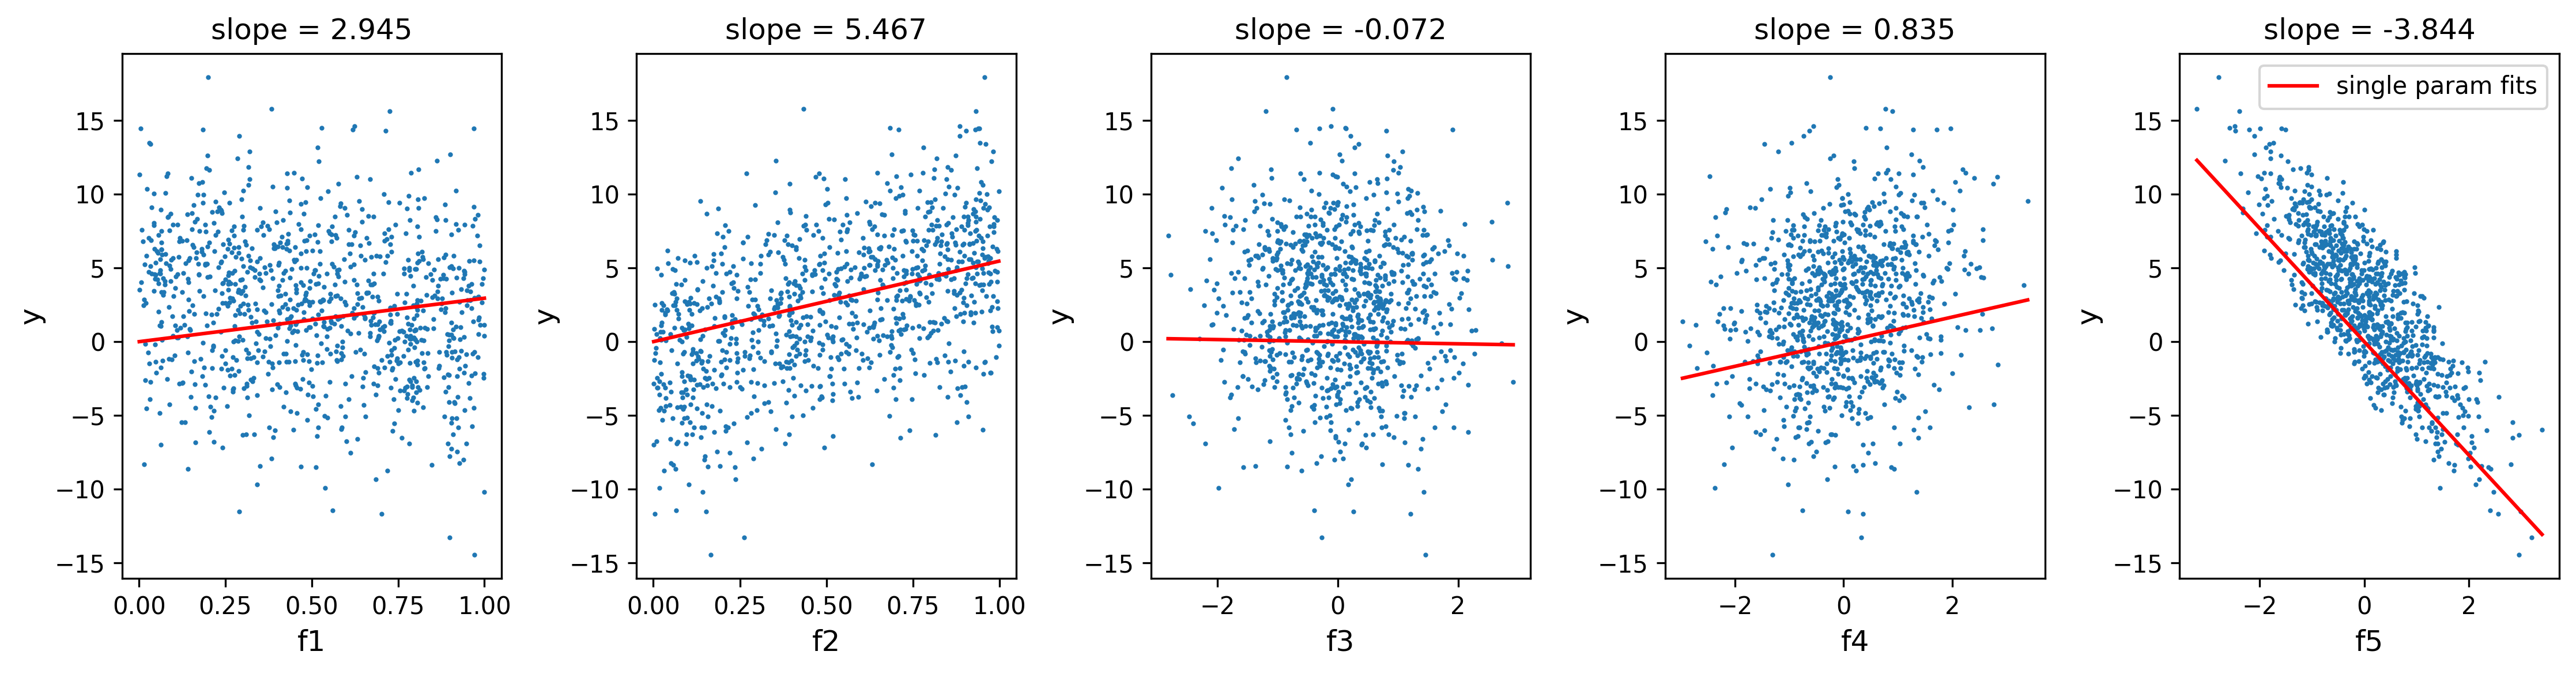

Factor loadings vector is:  [ 0.          0.          0.          0.88549607 -3.85648699]


In [167]:
size = 1000
# factor data
f1 = np.random.rand(size)
f2 = np.random.rand(size)
f3 = np.random.normal(size=size)
f4 = np.random.normal(size=size)
f5 = np.random.normal(size=size)
f  = np.column_stack([f1,f2,f3,f4,f5])

# simulated data ("stock prices"), generated from the sum of factors and a random component
y = 0 - 3*f1 + 8*f2 + 0.1*f3 + 1*f4 - 4*f5 + np.random.randn(size) * 0.1

# visualize relations between y and each factor
fig, axes = plt.subplots(1, 5, figsize=(15,4), dpi=300)

for i in range(5):
    axes[i].scatter(f[:,i], y, s=1)
    axes[i].set_xlabel("f"+str(i+1), size=12)
    axes[i].set_ylabel("y", size=12)
    m = np.linalg.lstsq(f[:,i].reshape(-1, 1), y.reshape(-1, 1), rcond=None)[0][0][0]
    x_range = np.linspace(np.min(f[:,i]), np.max(f[:,i]), 5)
    axes[i].plot(x_range, m*x_range, "r-", label="single param fits")
    axes[i].set_title("slope = "+str(round(m,3)), size=12)
plt.tight_layout()
plt.legend()
plt.show()

# vector of 1s and 0s representing which factors you want to use for this stock
pick_vector = np.array([0,0,0,1,1])

# select corresponding indexes
pick_indexes = np.where(pick_vector==1)[0]
pick_indexes

# select out only the factors we want to use
x = pd.DataFrame(f, columns = ["f1","f2","f3","f4","f5"]).iloc[:,pick_indexes]

F_vector = np.zeros(np.shape(f)[1])
# calculate factor loadings vector and populate only non-zero factor loadings
F_vector[pick_indexes] = np.linalg.lstsq(x, y, rcond=None)[0]
print("Factor loadings vector is: ", F_vector)

In [177]:
c.M_t

,1,2,3,4,5,6,7,8
JJSF,1,1,0,0,1,1,0,0
DGSE,1,1,0,1,1,1,0,1
ELA,0,1,0,0,0,0,1,1
PLXS,0,1,0,0,0,0,1,0
RMCF,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
VPG,1,0,1,1,1,0,0,0
FN,0,0,1,0,1,1,0,1
CBOE,1,0,0,1,0,0,0,0
SANW,0,1,0,1,1,1,1,1


In [182]:
c.Rf

Diagonal    0.001401
0           0.001401
1           0.001401
2           0.001401
3           0.001401
4           0.001401
Name: 2019-02-01 00:00:00, dtype: float64

In [181]:
c_Rf

,1,2,3,4,5,6,7,8
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768
1,-1.179158,1.301428,0.895260,1.374964,-1.332212,-1.968625,-0.660056,0.175819
2,0.498690,1.047972,0.284280,1.742669,-0.222606,-0.913079,-1.681218,-0.888971
3,0.242118,-0.888720,0.936742,1.412328,-2.369587,0.864052,-2.239604,0.401499
4,1.224871,0.064856,-1.279689,-0.585431,-0.261645,-0.182245,-0.202897,-0.109883
...,...,...,...,...,...,...,...,...
95,0.131574,-1.405560,-0.349782,2.023472,0.505387,0.359249,-1.582494,2.243602
96,-1.422795,1.922325,-2.115056,1.405365,1.618054,-0.824409,0.422580,0.547481
97,-0.813794,-1.449118,-1.317717,0.541008,-0.085116,-0.564301,0.966768,0.508068
98,-0.755463,-1.201202,0.523262,-0.537583,0.099205,1.576299,0.502328,-0.862267


In [183]:
mask

,1,2,3,4,5,6,7,8
AAPL,1,0,1,0,0,0,1,0
GOOGL,0,1,1,1,0,1,0,1
AMZN,1,1,1,0,1,0,0,1
MSFT,1,1,0,0,1,1,1,0
TSLA,1,1,0,1,0,1,1,0


In [178]:
import numpy as np
import pandas as pd

# Example data for c.Rs (stock returns) and c.Rf (factor returns)
# Replace these with your actual data
np.random.seed(0)  # For reproducibility

tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
time_periods = 100  # Example number of time periods

# Random returns for stocks
c_Rs = pd.DataFrame(
    np.random.randn(time_periods, len(tickers)),
    columns=tickers
)

# Random factor returns
c_Rf = pd.DataFrame(
    np.random.randn(time_periods, 8),
    columns=[str(i) for i in range(1, 9)]
)

# Example mask DataFrame from the previous task
mask = pd.DataFrame(
    np.random.randint(0, 2, size=(len(tickers), 8)),
    index=tickers,
    columns=[str(i) for i in range(1, 9)]
)

# DataFrame to store regression coefficients
df_regression = pd.DataFrame(index=tickers, columns=[str(i) for i in range(1, 9)])

# Perform the regression for each stock
for ticker in tickers:
    selected_factors = mask.loc[ticker] == 1  # Boolean mask for selected factors
    X = c_Rf.loc[:, selected_factors].values  # Select the factors
    y = c_Rs[ticker].values  # The returns for the current stock
    
    if X.shape[1] > 0:  # Only perform regression if there are selected factors
        coeffs, _, _, _ = np.linalg.lstsq(X, y, rcond=None)  # Perform the regression
        df_regression.loc[ticker, selected_factors] = coeffs  # Store the coefficients

# Fill NaN with 0 where no factors were selected
df_regression = df_regression.fillna(0)

print(df_regression)


              1         2         3         4         5         6         7  \
AAPL  -0.062135  0.000000  0.188945  0.000000  0.000000  0.000000 -0.180909   
GOOGL  0.000000  0.097708 -0.013448  0.249573  0.000000  0.078335  0.000000   
AMZN   0.006390 -0.135201 -0.070658  0.000000  0.049625  0.000000  0.000000   
MSFT  -0.030983 -0.188023  0.000000  0.000000 -0.041187  0.185963  0.052601   
TSLA   0.037970  0.141072  0.000000  0.035170  0.000000  0.233234 -0.088770   

              8  
AAPL   0.000000  
GOOGL  0.050176  
AMZN  -0.185600  
MSFT   0.000000  
TSLA   0.000000  


/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_1030/2040958658.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_regression = df_regression.fillna(0)


In [236]:
c_Rs[ticker].values

array([ 1.86755799,  0.4105985 ,  0.44386323, -0.85409574,  2.26975462,
        1.46935877, -0.34791215, -0.30230275, -0.50965218, -0.21274028,
       -0.02818223, -0.36274117,  0.17742614,  0.0519454 ,  0.40234164,
        0.05616534,  1.48825219,  1.05445173,  0.3563664 ,  0.40198936,
       -1.17312341,  1.48051479, -0.26800337,  0.92220667, -0.69456786,
        0.40746184, -0.63584608, -1.09306151,  2.38314477, -0.4615846 ,
       -0.09845252, -0.43782004, -1.22543552,  0.31694261, -1.03424284,
        0.01747916,  0.62523145,  1.5430146 ,  0.52327666,  1.33652795,
        0.64013153, -0.09815039, -0.94444626, -0.04225715, -1.54079701,
       -0.23792173, -1.15618243,  0.67690804, -0.30901297, -1.46642433,
        0.69153875,  0.61037938, -1.93627981,  0.09740017, -0.65240858,
        2.06449286,  0.28634369,  1.30184623, -0.1359497 ,  0.37005589,
        0.66638308, -0.15957344, -0.38487981, -0.10730528, -1.15735526,
        0.94326072, -2.65917224,  1.6595508 , -0.44092263,  0.34

,0,3,4
Date,,,
2019-01-02,0.002281,0.002281,0.002281
2019-01-03,-0.020158,-0.020158,-0.020158
2019-01-04,0.033932,0.033932,0.033932
2019-01-07,0.009664,0.009664,0.009664
2019-01-08,0.010434,0.010434,0.010434
...,...,...,...
2020-01-27,-0.014994,-0.014994,-0.014994
2020-01-28,0.009935,0.009935,0.009935
2020-01-29,-0.001023,-0.001023,-0.001023


In [254]:
X.shape
y.shape
c.F

,1,2,3,4,5,6,7,8
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_1030/3405605726.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c.F = pd.DataFrame(index=tickers, columns=[str(i) for i in range(1, 9)]).fillna(0)
/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_1030/3405605726.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4651410294656972' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  c.F.loc[ticker, mask] = coeffs
/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_1030/3405605726.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.465141

,1,2,3,4,5,6,7,8
AAPL,0.000000,0,0,0.000000,0.000000,0,0,0
GOOGL,0.000000,0,0,0.000000,0.000000,0,0,0
AMZN,0.000000,0,0,0.000000,0.000000,0,0,0
MSFT,0.000000,0,0,0.000000,0.000000,0,0,0
TSLA,0.465141,0,0,0.465141,0.465141,0,0,0
